# Machine Learning in Stroke survival 
(ONLY for technique demo)

# Include libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sksurv.column import encode_categorical

# Data Preprocessing

In [2]:
data = pd.read_csv(os.path.join('..', '..', 'data', 'tidy_Stroke_Vital_Sign.csv'))

data_x = data.drop(['LOC', 'UID', 'Hospital_ID', 'SurvivalWeeks', 'admission_date',
                    'discharge_date', 'death_date', 'Mortality', 'CVDeath', 'SurvivalDays', 'CAD'], axis=1)

data_y = data[['Mortality', 'SurvivalWeeks']].copy()
data_y.loc[:, 'Mortality'] = data_y['Mortality'].astype(bool)
data_y = np.array(list(data_y.to_records(index=False)))

# Remove high-correlation features

In [3]:
data_x = data_x.drop(['ICU', 'Age'], axis=1)

# Data split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=369)

In [5]:
categorical_columns = ['Sex', 'AF', 'DM', 'HTN', 'Hyperlipidemia', 'CHF', 'Smoking',
                       'Cancer before adm', 'Foley', 'NG', 'Dyslipidemia']
numerical_columns = np.setdiff1d(data_x.columns, categorical_columns)

categorical_ix = [data_x.columns.get_loc(col) for col in categorical_columns]
numerical_ix =  np.setdiff1d(list(range(0, len(data_x.columns))), categorical_ix)

In [6]:
X_train

,Sex,AF,DM,HTN,Hyperlipidemia,CHF,Smoking,Cancer before adm,ALT,CHOL,...,Mean RR,MeanRR G,RR SD,RRSD G,RR CV,RRCV G,Dyslipidemia,eNIHSS,BMI,LDL
7190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28.0,259.0,...,16.800000,2.0,0.979796,1.0,0.058321,2.0,0.0,4.057760,30.1,171.0
3370,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,48.0,185.0,...,16.966667,2.0,0.604612,1.0,0.035635,1.0,0.0,4.057760,24.5,134.0
8445,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,202.0,...,17.222222,3.0,1.227262,2.0,0.071260,2.0,1.0,4.057760,26.0,134.0
5496,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,161.0,...,17.064935,3.0,3.097287,4.0,0.181500,5.0,0.0,18.436200,22.4,106.0
9180,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,44.0,229.0,...,17.538462,3.0,1.277942,2.0,0.072865,2.0,1.0,4.057760,25.4,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,183.0,...,16.555556,2.0,0.831479,1.0,0.050224,2.0,0.0,4.057760,37.0,108.0
4370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,179.0,...,18.571429,4.0,0.903508,1.0,0.048650,2.0,0.0,4.057760,26.4,111.0
1389,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,166.0,...,16.571429,2.0,2.770103,3.0,0.167161,5.0,1.0,4.057760,20.3,87.0
270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0,205.0,...,18.656250,4.0,0.887742,1.0,0.047584,2.0,0.0,15.482139,15.3,124.0


# Numeric data standardization

In [7]:
from sklearn import preprocessing
import copy
scaler = preprocessing.StandardScaler()
X_train = copy.deepcopy(X_train)
X_test = copy.deepcopy(X_test)

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [8]:
X_train

,Sex,AF,DM,HTN,Hyperlipidemia,CHF,Smoking,Cancer before adm,ALT,CHOL,...,Mean RR,MeanRR G,RR SD,RRSD G,RR CV,RRCV G,Dyslipidemia,eNIHSS,BMI,LDL
7190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.051636,1.878263,...,-0.659066,-1.080794,-0.667733,-1.184747,-0.613266,-0.583987,0.0,-0.527411,1.218930,1.645935
3370,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.813430,0.147568,...,-0.537902,-1.080794,-1.183118,-1.184747,-1.194519,-1.638416,0.0,-0.527411,-0.098110,0.626779
8445,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.443531,0.545160,...,-0.352117,-0.117933,-0.327792,0.054391,-0.281740,-0.583987,1.0,-0.527411,0.254669,0.626779
5496,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.557800,-0.413739,...,-0.466463,-0.117933,2.241037,2.532668,2.542797,2.579299,0.0,1.945755,-0.592000,-0.144474
9180,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.661071,1.176630,...,-0.122216,-0.117933,-0.258173,0.054391,-0.240624,-0.583987,1.0,-0.527411,0.113557,1.425577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.557800,0.100793,...,-0.836774,-1.080794,-0.871473,-1.184747,-0.820741,-0.583987,0.0,-0.527411,2.841711,-0.089385
4370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.557800,0.007241,...,0.628736,0.844928,-0.772529,-1.184747,-0.861048,-0.583987,0.0,-0.527411,0.348743,-0.006751
1389,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.557800,-0.296800,...,-0.825234,-1.080794,1.791589,1.293530,2.175414,2.579299,1.0,-0.527411,-1.085890,-0.667825
270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.329262,0.615324,...,0.690400,0.844928,-0.794186,-1.184747,-0.888368,-0.583987,0.0,1.437641,-2.261819,0.351331


In [9]:
X_test

,Sex,AF,DM,HTN,Hyperlipidemia,CHF,Smoking,Cancer before adm,ALT,CHOL,...,Mean RR,MeanRR G,RR SD,RRSD G,RR CV,RRCV G,Dyslipidemia,eNIHSS,BMI,LDL
8931,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.519710,0.381446,...,-0.021196,-0.117933,-1.065337,-1.184747,-1.106956,-1.638416,0.0,-0.527411,-0.121629,0.709413
1829,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.138813,0.217731,...,-1.695020,-2.043654,-0.487466,0.054391,-0.256084,-0.583987,0.0,-0.527411,-0.333296,-0.061840
5690,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.367351,-1.115372,...,-0.241050,-0.117933,0.039698,0.054391,0.096700,0.470441,0.0,-0.527411,-0.239221,-1.659436
8706,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.432533,0.194344,...,-0.945317,-1.080794,-0.233847,0.054391,-0.084130,-0.583987,1.0,-0.527411,1.030781,-0.089385
6472,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.329262,-0.133085,...,-1.167956,-1.080794,-0.872596,-1.184747,-0.785630,-0.583987,0.0,-0.527411,-0.568482,0.048339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.291172,0.849201,...,0.345495,0.844928,-0.600803,0.054391,-0.658172,-0.583987,1.0,-0.527411,0.090039,0.626779
3342,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.367351,-0.086310,...,-0.029013,-0.117933,0.576583,0.054391,0.627134,0.470441,0.0,1.437641,-1.909040,-0.144474
284,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.443531,0.311283,...,-0.283162,-0.117933,0.285733,0.054391,0.369073,0.470441,0.0,0.730282,-0.897742,-0.640280
9451,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.394443,-0.203249,...,-0.150177,-0.117933,-0.906164,-1.184747,-0.927162,-0.583987,0.0,-0.527411,0.278187,-0.254653


# One-hot-Encode

In [10]:
X_train = encode_categorical(X_train, columns=categorical_columns)
X_test = encode_categorical(X_test, columns=categorical_columns)

In [11]:
# temp_x = X_test.sort_values(by=['Age'])
# temp_af = temp_x[temp_x['AF=1.0'] == 1]
# temp_non_af = temp_x[temp_x['AF=1.0'] == 0]
# demo_x = pd.concat([temp_af.head(3),
#                     temp_non_af.head(3)])
# demo_x

 # Kaplan-Meier method

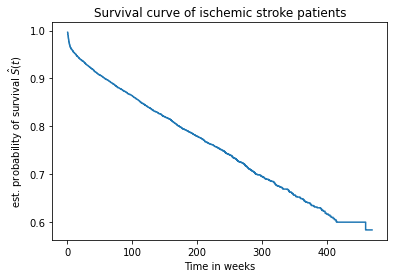

In [12]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y['Mortality'], data_y['SurvivalWeeks'])
plt.title('Survival curve of ischemic stroke patients')
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("Time in weeks")
plt.show()

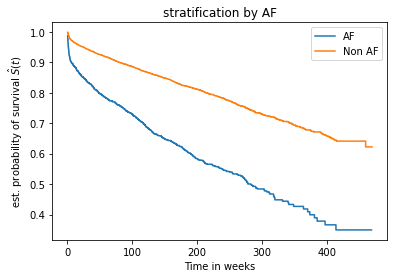

In [13]:
data_af = data_y[data_x.AF == 1]
data_non_af = data_y[data_x.AF == 0]
plt.title('stratification by AF')

af_time, af_survival_prob = kaplan_meier_estimator(data_af['Mortality'], data_af['SurvivalWeeks'])
plt.step(af_time, af_survival_prob, where="post", label="AF")
non_af_time, non_af_survival_prob = kaplan_meier_estimator(data_non_af['Mortality'], data_non_af['SurvivalWeeks'])
plt.step(non_af_time, non_af_survival_prob, where="post", label="Non AF")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("Time in weeks")
plt.legend(loc="best")
plt.show()

# Random Survival Forests

## RSF performance (c-index)

In [14]:
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=369)

rsf.fit(X_train, y_train)

print('C-index = %.3f' %(rsf.score(X_test, y_test)))

C-index = 0.823


## RSF- Predict survival function

In [15]:
surv = rsf.predict_survival_function(demo_x, return_array=True)

for i, s in enumerate(surv):
    if i < 3:
        plt.step(rsf.event_times_, s, where="post", label='AF_'+str(i))
    else:
        plt.step(rsf.event_times_, s, where="post", label='Non_AF_'+str(i))
plt.title('Six demo cases')
plt.ylabel("Survival probability")
plt.xlabel("Time in weeks")
plt.legend()
plt.grid(True)

NameError: name 'demo_x' is not defined

## RSF- Predicted cumulative hazard function

In [ ]:
surv = rsf.predict_cumulative_hazard_function(demo_x, return_array=True)

for i, s in enumerate(surv):
    if i < 3:
        plt.step(rsf.event_times_, s, where="post", label='AF_'+str(i))
    else:
        plt.step(rsf.event_times_, s, where="post", label='Non_AF_'+str(i))
plt.title('Six demo cases')
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in weeks")
plt.legend()
plt.grid(True)

## RSF- Predicted risk scores

In [ ]:
pd.Series(rsf.predict(demo_x))

## RSF- Permutation-based Feature Importance

In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance
# feature_names = data_x_one_hot.columns.values
# perm = PermutationImportance(rsf, n_iter=15, random_state=369)
# perm.fit(X_test, y_test)
# eli5.show_weights(perm, feature_names=feature_names)

# Gradient Boosted Models
While a Random Survival Forest fits a set of Survival Trees independently and then averages their predictions, a gradient boosted model is constructed sequentially in a greedy stagewise fashion.

## Gradient boosting with regression tree base learner

In [ ]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

est_cph_tree = GradientBoostingSurvivalAnalysis(
    n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0
)

est_cph_tree.fit(X_train, y_train)

print('C-index = %.3f' %est_cph_tree.score(X_test, y_test))

## Gradient boosting with component-wise least squares base learner

In [ ]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis

est_cph_ls = ComponentwiseGradientBoostingSurvivalAnalysis(
    n_estimators=100, learning_rate=1.0, random_state=0
)

est_cph_ls.fit(X_train, y_train)

print('C-index = %.3f' %est_cph_ls.score(X_test, y_test))

In [ ]:
coef = pd.Series(est_cph_ls.coef_, ["Intercept"] + X_train.columns.tolist())

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

# Survival Support Vector Machine

## As a ranking problem
The model learns to assign samples with shorter survival times a lower rank by considering all possible pairs of samples in the training data.

In [ ]:
from sksurv.svm import FastSurvivalSVM

fsSVM = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=0)
fsSVM.fit(X_train, y_train)

print('C-index = %.3f' %fsSVM.score(X_test, y_test))

## As a regression problem

In [ ]:
y_log_t = y_train.copy()
y_log_t["SurvivalWeeks"] = np.log1p(y_train["SurvivalWeeks"])
y_log_t

In [ ]:
from sksurv.metrics import concordance_index_censored
ref_estimator = FastSurvivalSVM(rank_ratio=0.0, max_iter=1000, tol=1e-5, random_state=0)
ref_estimator.fit(X_train, y_log_t)

cindex = concordance_index_censored(
    y_train['Mortality'],
    y_train['SurvivalWeeks'],
    -ref_estimator.predict(X_train),  # flip sign to obtain risk scores
)
print(cindex[0])

##  Cox’s proportional hazard’s model

In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(X_train, y_train)
print('C-index = %.3f' %(estimator.score(X_test, y_test)))